# Import Libraries

In [1]:
import pandas as pd
import torch
import nltk
import re
from typing import List
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

# try:
#     nltk.data.find('tokenizers/punkt')
# except LookupError:
#     nltk.download('punkt')

# Load Data

In [2]:
df = pd.read_csv('./data/train.tsv', sep='\t')
train_data = df.to_records(index=False)
train_data[:3]

rec.array([('nano composites were prepared by dispersing barium titanate  BT  and/or oMMT clay particles in epoxy resin.', 'action'),
           ('In this process, the magnetic stirring lasted 2 h at room temperature.', 'action'),
           ('This coating heating cycle was repeated several times to achieve the desired film thickness', 'action')],
          dtype=[('text', 'O'), ('label', 'O')])

## Preprocessing

In [3]:
# Saw hyphens like this in the middle of a lot of words e.g. "transmission elec- tron microscopy". Seem like line breaks

def dehyphenate(text: str, p=False) -> str:
    text_dh = re.sub(r'([a-z])- ([a-z])', r'\1\2', text)
    
    if p and text != text_dh:
        print("before:", text)
        print("after :", text_dh)
    
    return text_dh

In [4]:
train_data = [(dehyphenate(t), l) for t, l in train_data]

## Tokenization

In [5]:
train_data = [(nltk.tokenize.word_tokenize(t), l) for t, l in train_data]

## Visualization

In [6]:
train_text   = [x[0] for x in train_data]
train_text   = [w for sentence in train_text for w in sentence]

train_target = [x[1] for x in train_data]

In [7]:
train_text

['nano',
 'composites',
 'were',
 'prepared',
 'by',
 'dispersing',
 'barium',
 'titanate',
 'BT',
 'and/or',
 'oMMT',
 'clay',
 'particles',
 'in',
 'epoxy',
 'resin',
 '.',
 'In',
 'this',
 'process',
 ',',
 'the',
 'magnetic',
 'stirring',
 'lasted',
 '2',
 'h',
 'at',
 'room',
 'temperature',
 '.',
 'This',
 'coating',
 'heating',
 'cycle',
 'was',
 'repeated',
 'several',
 'times',
 'to',
 'achieve',
 'the',
 'desired',
 'film',
 'thickness',
 'Four',
 'different',
 'soaking',
 'temperatures',
 'were',
 'used',
 ':',
 '65',
 ',',
 '85',
 ',',
 '100',
 'and',
 '125',
 'C',
 '.',
 'The',
 'fractured',
 'crosssections',
 'of',
 'the',
 'samples',
 'were',
 'examined',
 'by',
 'transmission',
 'electron',
 'microscopy',
 'TEM',
 ',',
 'Hitachi',
 'H-800',
 '.',
 'Thin',
 'films',
 'of',
 'the',
 'nanocomposites',
 'were',
 'fabricated',
 'by',
 'casting',
 'DMF',
 'solution',
 'of',
 'the',
 'TiO2',
 'nanoparticles',
 'and',
 'P',
 '(',
 'VDF-TrFE-CTFE',
 ')',
 'followed',
 'by',
 'dr

In [8]:
'The' in train_text

True

In [9]:
'the' in train_text

True

In [10]:
'and' in train_text

True

In [11]:
'AND' in train_text

False

In [12]:
len(train_text)

18934

In [13]:
counts = sorted(Counter(train_text).items(), key=lambda x: x[1], reverse=True)
counts

[('.', 744),
 ('the', 693),
 (',', 680),
 ('and', 509),
 (')', 496),
 ('(', 495),
 ('of', 469),
 ('was', 399),
 ('were', 353),
 ('a', 337),
 ('The', 301),
 ('to', 285),
 ('in', 283),
 ('for', 283),
 ('at', 195),
 ('with', 188),
 ('by', 171),
 ('from', 117),
 ('as', 113),
 ('h', 112),
 ('%', 112),
 ('used', 92),
 ('then', 92),
 ('solution', 85),
 ('1', 84),
 ('°C', 81),
 ('is', 73),
 ('mixture', 71),
 ('epoxy', 70),
 ('min', 69),
 ('temperature', 66),
 ('resin', 65),
 ('nanoparticles', 64),
 ('an', 61),
 ('samples', 59),
 ('particles', 57),
 ('using', 55),
 ('prepared', 52),
 ('into', 52),
 ('under', 51),
 ('added', 49),
 ('2', 47),
 ('vacuum', 47),
 ('are', 46),
 ('composites', 45),
 ('mixed', 45),
 ('dried', 44),
 ('obtained', 44),
 ('10', 44),
 ('g', 44),
 ('C', 43),
 ('stirred', 42),
 ('nm', 40),
 ('mm', 39),
 ('water', 39),
 ('composite', 38),
 ('A', 38),
 ('BaTiO3', 37),
 ('[', 37),
 (']', 37),
 ('room', 36),
 ('films', 35),
 ('mL', 35),
 ('polymer', 35),
 ('this', 33),
 ('nanocom

In [14]:
for x in train_data:
    if '5min' in x[0]:
        print(x[0])

['Compounding', 'of', 'these', 'blends', 'was', 'carried', 'out', 'with', 'a', '4', 'g', 'capacity', 'DACA', 'Micro', 'Compounder', '(', 'DACA', 'Instruments', ',', 'Goleta', ',', 'USA', ')', 'operating', 'at', '260', '8C', ',', '50', 'rpm', ',', 'and', 'a', 'mixing', 'time', 'of', '5min', '.']
['First', ',', 'a', 'solution', 'containing', 'appropriate', 'quantities', 'of', 'absolute', 'ethanol', ',', 'ammonia', 'and', 'deionized', 'water', 'was', 'stirred', 'for', '5min', 'to', 'ensure', 'complete', 'mixing', '.']


In [15]:
for x in train_data:
    if '10−3' in x[0]:
        print(x[0])

['Ba', '(', 'OH', ')', '2·8H2O', '(', '0.804', 'g', ',', '2.55', '×', '10−3', 'mol', ')', 'and', 'Sr', '(', 'OH', ')', '2·8H2O', '(', '0.120', 'g', ',', '0.45', '×', '10−3', 'mol', ')', 'were', 'added', 'to', 'H2Ti3O7', '(', '0.129', 'g', ',', '5', '×', '10−4', 'mol', ')', 'to', 'fully', 'transform', 'the', 'H2Ti3O7', 'NWs', 'to', 'Ba0.7Sr0.3TiO3', 'NWs', 'in', 'a', '90', 'mL', 'Teflon', 'autoclave', '.']


In [16]:
'−' == '-'

False

In [17]:
freq = [x[1] for x in counts]
freq

[744,
 693,
 680,
 509,
 496,
 495,
 469,
 399,
 353,
 337,
 301,
 285,
 283,
 283,
 195,
 188,
 171,
 117,
 113,
 112,
 112,
 92,
 92,
 85,
 84,
 81,
 73,
 71,
 70,
 69,
 66,
 65,
 64,
 61,
 59,
 57,
 55,
 52,
 52,
 51,
 49,
 47,
 47,
 46,
 45,
 45,
 44,
 44,
 44,
 44,
 43,
 42,
 40,
 39,
 39,
 38,
 38,
 37,
 37,
 37,
 36,
 35,
 35,
 35,
 33,
 33,
 33,
 33,
 32,
 32,
 31,
 31,
 30,
 30,
 29,
 29,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,

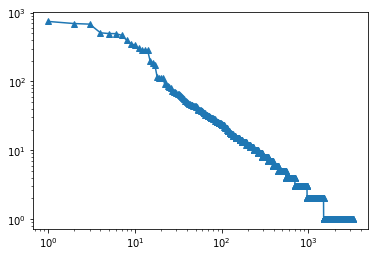

In [18]:
x = list(range(1, len(freq)+1))
plt.plot(x, freq, marker='^')
plt.xscale('log')
plt.yscale('log')
plt.show()

<AxesSubplot:ylabel='Count'>

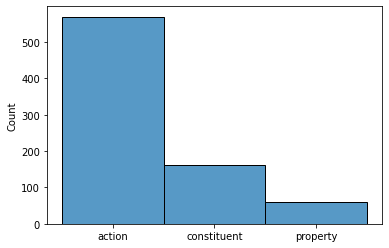

In [19]:
sns.histplot(data=train_target)

In [20]:
'null' in train_target

False

## Indexing

In [22]:
word_types = [x[0] for x in counts]
word_type2idx = {wordtype: i for i, wordtype in enumerate(word_types)}

In [23]:
label_counts = sorted(Counter(train_target).items(), key=lambda x: x[1], reverse=True)
label_types = [x[0] for x in label_counts]
label_type2idx = {labeltype: i for i, labeltype in enumerate(label_types)}

In [24]:
train_data_idx = [([word_type2idx[w] for w in t], label_type2idx[l]) for t, l in train_data]
train_data_idx[:3]

[([449, 44, 8, 37, 16, 387, 547, 260, 232, 963, 964, 1494, 35, 12, 28, 31, 0],
  0),
 ([109, 64, 116, 2, 1, 233, 97, 1495, 41, 19, 14, 60, 30, 0], 0),
 ([123, 965, 290, 697, 7, 291, 292, 124, 11, 698, 1, 293, 160, 87], 0)]

In [39]:
label_type2idx

{'action': 0, 'constituent': 1, nan: 2, 'property': 3}

## Featurization

In [31]:
def bow(word_ids: list, vocab_size: int) -> list:
    counts = Counter(word_ids)
    return [counts[i] for i in range(vocab_size)]

In [36]:
# def onehot(x: int, num_category: int) -> list:
#     v = [0 for i in range(num_category)]
#     v[x] = 1
#     return v

In [45]:
V = len(word_type2idx)
# C = len(label_type2idx)
train_data_bow = [(bow(t, V), l) for t, l in train_data_idx]
train_data_bow[:3]

[([1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0

In [46]:
X = [t for t, l in train_data_bow]
y = [l for t, l in train_data_bow]

## Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Learn Classifiers

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
model.score(X_val, y_val)

0.8895027624309392

In [53]:
model.predict(X_val)

array([0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 3, 0, 2])

In [55]:
from sklearn.metrics import f1_score

In [56]:
num_trial = 20
f1s = []

for i in range(num_trial):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='micro')
    f1s.append(f1)

print("mean:", np.mean(f1s))
print("std :", np.std(f1s))

mean: 0.8428176795580112
std : 0.030735070308521385


## SVM

## Attention